In [27]:
import pandas as pd
from pycaret.classification import setup as classification_setup, compare_models as classification_compare_models
from pycaret.regression import setup as regression_setup, compare_models as regression_compare_models

# Load data from CSV file
feature_df = pd.read_csv('train_data.csv')

In [4]:
import pandas as pd
from pycaret.classification import setup as classification_setup, compare_models as classification_compare_models
from pycaret.regression import setup as regression_setup, compare_models as regression_compare_models
from pycaret.classification import predict_model as predict_classification
from pycaret.regression import predict_model as predict_regression
from sklearn.metrics import classification_report, mean_squared_error, r2_score

In [28]:
feature_df.columns

Index(['DAYS_SINCE_LAST_SEEN', 'IS_CHURNED_10_DAYS', 'N_ORDERS_COMPLETED',
       'TOTAL_SESSIONS_TILL_DATE', 'MAX_TIMESTAMP_BW_TRACKS_PAGES',
       'GROSS_AMT_SPENT_IN_PAST_90_DAYS'],
      dtype='object')

In [29]:
# Define train size
train_size = 0.7  # 70% of data for training

# Calculate test and validation sizes
test_size = (1 - train_size) / 2
val_size = test_size

# Initialize PyCaret setup for classification
clf_setup = regression_setup(data=feature_df, target='GROSS_AMT_SPENT_IN_PAST_90_DAYS', 
                                 train_size=train_size,
                                 fold_strategy='stratifiedkfold',
                                 fold=5,
                                 session_id=42)

# Compare different classification models and select the best one
best_clf_model = regression_compare_models()


,Description,Value
0,Session id,42
1,Target,GROSS_AMT_SPENT_IN_PAST_90_DAYS
2,Target type,Regression
3,Original data shape,"(1996, 6)"
4,Transformed data shape,"(1996, 6)"
5,Transformed train set shape,"(1397, 6)"
6,Transformed test set shape,"(599, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,28.9008,2514.2310,49.4412,0.3319,2.5137,0.6993,0.2400
ridge,Ridge Regression,28.8927,2514.8962,49.4477,0.3317,2.5098,0.6985,0.1760
br,Bayesian Ridge,28.8923,2514.9397,49.4482,0.3317,2.5097,0.6985,0.0060
lasso,Lasso Regression,28.9705,2528.2075,49.5582,0.3293,2.5284,0.6900,0.1740
lar,Least Angle Regression,29.7043,2578.8046,50.0017,0.3178,2.5526,0.7055,0.1820
llar,Lasso Least Angle Regression,29.7761,2586.3790,50.0582,0.3167,2.5669,0.6952,0.0060
lightgbm,Light Gradient Boosting Machine,27.8191,2580.3820,50.2307,0.3084,2.3305,0.7304,0.4180
gbr,Gradient Boosting Regressor,28.0995,2585.3846,50.2441,0.3084,2.3553,0.7364,0.0120
huber,Huber Regressor,19.4710,2721.6185,51.4025,0.2786,1.5533,0.7923,0.0100
rf,Random Forest Regressor,28.1040,2752.5296,51.9841,0.2558,2.2836,0.7812,0.0300


In [45]:
from pycaret.datasets import get_data
from pycaret.classification import setup, create_model
import shap
from sklearn import linear_model

data = pd.read_csv('train_data.csv')

# Setup the PyCaret environment
setup(data=data, target='IS_CHURNED_10_DAYS')

# Create a model using PyCaret
model = create_model('rf') # Logistic Regression


linear_model = create_model('lr')

,Description,Value
0,Session id,1331
1,Target,IS_CHURNED_10_DAYS
2,Target type,Binary
3,Original data shape,"(1996, 6)"
4,Transformed data shape,"(1996, 6)"
5,Transformed train set shape,"(1397, 6)"
6,Transformed test set shape,"(599, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


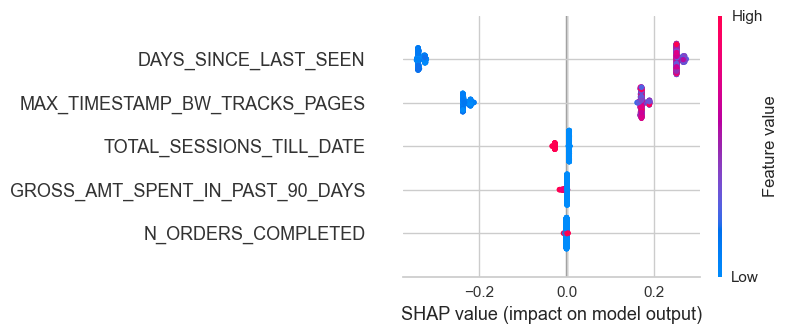

<Figure size 800x550 with 0 Axes>

In [49]:
from pycaret.classification import interpret_model
import matplotlib.pyplot as plt

# Assume 'model' is already created
model_type = model.__class__.__name__

if model_type in ['ExtraTreesClassifier', 'DecisionTreeClassifier', 'XGBClassifier', 'LGBMClassifier', 'RandomForestClassifier']:
    interpretation = interpret_model(model)
else:
    interpretation = interpret_model(model)

# Save the plot
plt.savefig('interpretation_plot.png')

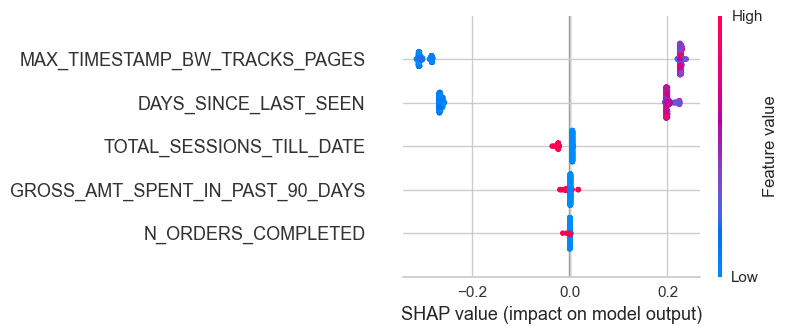

<Figure size 800x550 with 0 Axes>

In [44]:
from pycaret.classification import interpret_model
import matplotlib.pyplot as plt

# Assume 'model' is already created
interpretation = interpret_model(model)

# Save the plot
plt.savefig('interpretation_plot.png')

# New Flow

In [35]:
from pycaret.datasets import get_data
from pycaret.classification import setup, create_model
import shap
from sklearn import linear_model
import pandas as pd

data = pd.read_csv('train_data.csv')

# Setup the PyCaret environment

# Create a model using PyCaret
clf_setup = regression_setup(data=data, target='GROSS_AMT_SPENT_IN_PAST_90_DAYS', 
                                 train_size=train_size,
                                 fold_strategy='stratifiedkfold',
                                 fold=5,
                                 session_id=42)

# Compare different classification models and select the best one
best_clf_model = regression_compare_models()


,Description,Value
0,Session id,42
1,Target,GROSS_AMT_SPENT_IN_PAST_90_DAYS
2,Target type,Regression
3,Original data shape,"(1996, 6)"
4,Transformed data shape,"(1996, 6)"
5,Transformed train set shape,"(1397, 6)"
6,Transformed test set shape,"(599, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,28.9008,2514.2310,49.4412,0.3319,2.5137,0.6993,0.2900
ridge,Ridge Regression,28.8927,2514.8962,49.4477,0.3317,2.5098,0.6985,0.0060
br,Bayesian Ridge,28.8923,2514.9397,49.4482,0.3317,2.5097,0.6985,0.1720
lasso,Lasso Regression,28.9705,2528.2075,49.5582,0.3293,2.5284,0.6900,0.1860
lar,Least Angle Regression,29.7043,2578.8046,50.0017,0.3178,2.5526,0.7055,0.0060
llar,Lasso Least Angle Regression,29.7761,2586.3790,50.0582,0.3167,2.5669,0.6952,0.1760
lightgbm,Light Gradient Boosting Machine,27.8191,2580.3820,50.2307,0.3084,2.3305,0.7304,0.4020
gbr,Gradient Boosting Regressor,28.0995,2585.3846,50.2441,0.3084,2.3553,0.7364,0.0120
huber,Huber Regressor,19.4710,2721.6185,51.4025,0.2786,1.5533,0.7923,0.0100
rf,Random Forest Regressor,28.1040,2752.5296,51.9841,0.2558,2.2836,0.7812,0.0300


LinearRegression


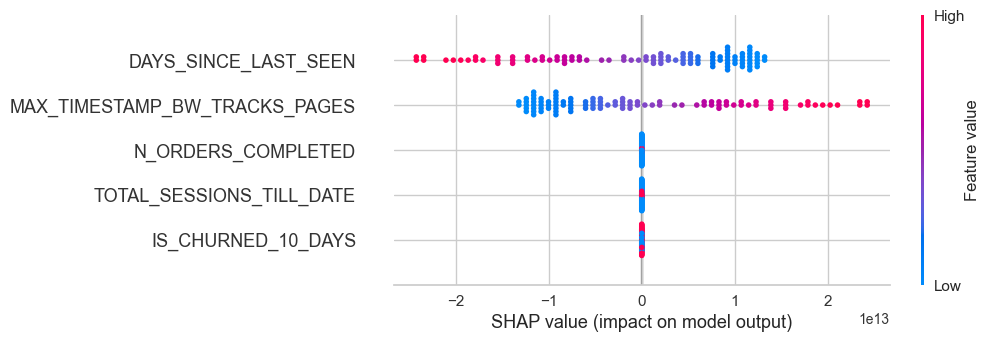

<Figure size 800x550 with 0 Axes>

In [44]:
train_data = data.drop('GROSS_AMT_SPENT_IN_PAST_90_DAYS', axis=1)
sample_data = train_data.sample(100, random_state=42)
model = best_clf_model

model_class = model.__class__.__name__

# Select the appropriate explainer based on the model class name
explainer_map = {
        'RidgeClassifier': shap.LinearExplainer,
        'AdaBoostClassifier': shap.KernelExplainer,
        'ExtraTreesClassifier': shap.TreeExplainer,
        'RandomForestClassifier': shap.TreeExplainer,
        'LogisticRegression': shap.LinearExplainer,
        'GaussianNB': shap.KernelExplainer,
        'KNeighborsClassifier': shap.KernelExplainer,
        'DecisionTreeClassifier': shap.TreeExplainer,
        'GradientBoostingClassifier': shap.TreeExplainer,
        'LinearDiscriminantAnalysis': shap.LinearExplainer,
        'LGBMClassifier': shap.TreeExplainer,
        'DummyClassifier': shap.KernelExplainer,
        'SVC': shap.KernelExplainer,
        'QuadraticDiscriminantAnalysis': shap.KernelExplainer,
        'XGBClassifier': shap.TreeExplainer,
        'LinearRegression': shap.LinearExplainer,
        'Ridge': shap.LinearExplainer,
        'BayesianRidge': shap.LinearExplainer,
        'Lasso': shap.LinearExplainer,
        'LeastAngleRegression': shap.LinearExplainer,
        'LassoLeastAngleRegression': shap.LinearExplainer,
        'LightGBM': shap.TreeExplainer,
        'GradientBoostingRegressor': shap.TreeExplainer,
        'HuberRegressor': shap.LinearExplainer,
        'RandomForestRegressor': shap.TreeExplainer,
        'DecisionTreeRegressor': shap.TreeExplainer,
        'ExtraTreesRegressor': shap.TreeExplainer,
        'XGBRegressor': shap.TreeExplainer,
        'AdaBoostRegressor': shap.TreeExplainer,
        'ElasticNet': shap.LinearExplainer,
        'OrthogonalMatchingPursuit': shap.LinearExplainer,
        'KNeighborsRegressor': shap.KernelExplainer,
        'DummyRegressor': shap.KernelExplainer,
        'PassiveAggressiveRegressor': shap.LinearExplainer
}
explainer_class = explainer_map[model_class]

explainer = explainer_class(model, sample_data)

print(model_class)
shap_values = explainer(sample_data)
if len(shap_values.shape) == 3:
    shap_values = shap_values[:,:,1]

shap.plots.beeswarm(shap_values, max_display=20)

import matplotlib.pyplot as plt
# Save the plot
plt.savefig('shap_plot.png')

# Dataframe

In [45]:
shap_values.shape

(100, 5)